In [1]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from finite_volume.advection import AdvectionSolver
from configs import problem_configs, solver_config
from utils import pd_xlsx_write

In [2]:
data = []
for n, p in product([128, 256, 512], range(1, 8)):
    ZhangShu_solver = AdvectionSolver(
        n=n,
        order=p + 1,
        apriori_limiting=True,
        courant="mpp",
        SED=True,
        **problem_configs["composite"],
        **solver_config,
    )
    ZhangShu_solver.highest = 3  # force integration to be at most third order
    ZhangShu_solver.rkorder()
    data.append(
        dict(
            config="Zhang and Shu",
            n=n,
            p=p,
            delta=ZhangShu_solver.compute_mpp_violations()[1]["worst"],
            solution_time=ZhangShu_solver.solution_time,
        )
    )

    Modified_solver = AdvectionSolver(
        n=n,
        order=p + 1,
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
        **problem_configs["composite"],
        **solver_config,
    )
    Modified_solver.highest = 3  # force integration to be at most third order
    Modified_solver.rkorder()
    data.append(
        dict(
            config="Modified",
            n=n,
            p=p,
            delta=Modified_solver.compute_mpp_violations()[1]["worst"],
            solution_time=Modified_solver.solution_time,
        )
    )
df = pd.DataFrame(data)

sheet_name = "composite"
try:
    pd_xlsx_write(df, "data/ZhangAndShu_vs_RomainAndYou.xlsx", sheet_name=sheet_name)
except ValueError:
    print(f"Sheet name {sheet_name} already exists")

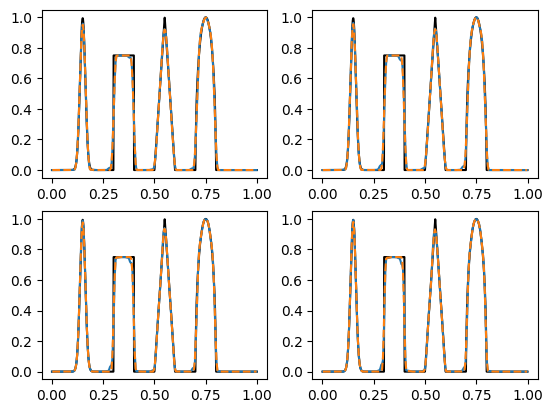

In [3]:
fig, axs = plt.subplots(2, 2)

high_res_ic = AdvectionSolver(n=2056, **problem_configs["composite"])
for i, j in product([0, 1], [0, 1]):
    high_res_ic.plot_slice(axs[i, j], i=0, color="black")

for p, (i, j) in zip([3, 4, 5, 7], product([0, 1], [0, 1])):
    ZhangShu_solver = AdvectionSolver(
        n=256,
        order=p + 1,
        apriori_limiting=True,
        courant="mpp",
        SED=True,
        **problem_configs["composite"],
        **solver_config,
    )
    ZhangShu_solver.highest = 3  # force integration to be at most third order
    ZhangShu_solver.rkorder()
    ZhangShu_solver.plot_slice(axs[i, j], label="Zhang & Shu")

    Modified_solver = AdvectionSolver(
        n=256,
        order=p + 1,
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
        **problem_configs["composite"],
        **solver_config,
    )
    Modified_solver.highest = 3  # force integration to be at most third order
    Modified_solver.rkorder()
    Modified_solver.plot_slice(axs[i, j], label="Modified a priori", linestyle="--")

In [4]:
data = []
for n, p in product([32, 64, 128], range(1, 8)):
    ZhangShu_solver = AdvectionSolver(
        n=(n,),
        order=p + 1,
        apriori_limiting=True,
        courant="mpp",
        SED=True,
        **problem_configs["square2d"],
        **solver_config,
    )
    ZhangShu_solver.highest = 3  # force integration to be at most third order
    ZhangShu_solver.rkorder()
    data.append(
        dict(
            config="Zhang and Shu",
            n=n,
            p=p,
            delta=ZhangShu_solver.compute_mpp_violations()[1]["worst"],
            solution_time=ZhangShu_solver.solution_time,
        )
    )

    Modified_solver = AdvectionSolver(
        n=(n,),
        order=p + 1,
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
        **problem_configs["square2d"],
        **solver_config,
    )
    Modified_solver.highest = 3
    Modified_solver.rkorder()
    data.append(
        dict(
            config="Modified",
            n=n,
            p=p,
            delta=Modified_solver.compute_mpp_violations()[1]["worst"],
            solution_time=Modified_solver.solution_time,
        )
    )
df = pd.DataFrame(data)

pd_xlsx_write(df, "data/ZhangAndShu_vs_RomainAndYou.xlsx", sheet_name="square2d")

Ratio of steps: 0.33
Ratio of steps: 0.15
Ratio of steps: 0.15
Ratio of steps: 0.10


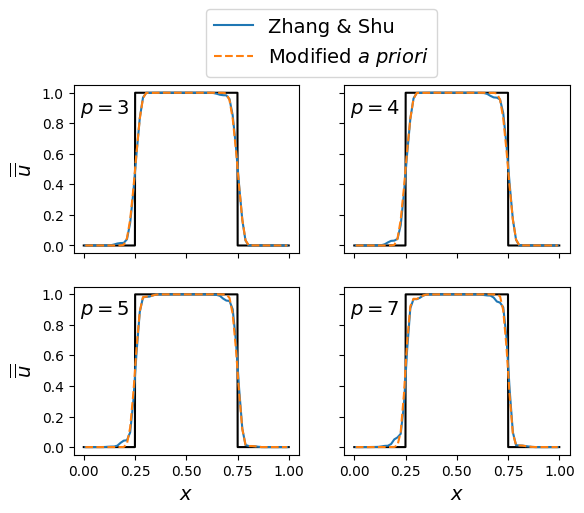

In [15]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
fontsize = 14

high_res_ic = AdvectionSolver(n=(2056,), **problem_configs["square2d"])
for i, j in product([0, 1], [0, 1]):
    high_res_ic.plot_slice(axs[i, j], i=0, color="black", y=0.5)

for p, (i, j) in zip([3, 4, 5, 7], product([0, 1], [0, 1])):
    ZhangShu_solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        apriori_limiting=True,
        courant="mpp",
        SED=True,
        **problem_configs["square2d"],
        **solver_config,
    )
    ZhangShu_solver.highest = 3  # force integration to be at most third order
    ZhangShu_solver.rkorder()
    ZhangShu_solver.plot_slice(axs[i, j], label="Zhang & Shu", y=0.5)

    Modified_solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        apriori_limiting=True,
        mpp_lite=True,
        courant=0.8,
        adaptive_stepsize=True,
        SED=True,
        **problem_configs["square2d"],
        **solver_config,
    )
    Modified_solver.highest = 3
    Modified_solver.rkorder()
    Modified_solver.plot_slice(
        axs[i, j], label="Modified $\it{a}$ $\it{priori}$", linestyle="--", y=0.5
    )

    axs[i, j].text(
        0.1,
        0.9,
        f"${p=}$",
        fontsize=fontsize,
        horizontalalignment="center",
        verticalalignment="center",
    )
    print(
        f"Ratio of steps: {Modified_solver.step_count / ZhangShu_solver.step_count :.2f}"
    )


# cosmetics
axs[1, 0].set_xlabel("$x$", fontsize=fontsize)
axs[1, 1].set_xlabel("$x$", fontsize=fontsize)
axs[0, 0].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
axs[1, 0].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
axs[0, 1].legend(fontsize=fontsize, loc="center", bbox_to_anchor=(-0.1, 1.25))

# download
fig.savefig(
    "images/ZhangAndShu_vs_RomainAndYou_square2d.png", dpi=300, bbox_inches="tight"
)